In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
bill = np.array([50,32,78,99,12,25,80,65])
tips = np.array([4,3,6,9,1,2,7,5])

In [3]:
correlation_coefficient = np.corrcoef(bill, tips)

In [4]:
correlation_coefficient

array([[1.       , 0.9882482],
       [0.9882482, 1.       ]])

### Correlation coefficient = 0.9882482
this can be interpreted as the correlation in bill and tips is positive(strongly)

In [5]:
bill.mean()

55.125

In [6]:
tips.mean()

4.625

In [8]:
slope = np.sum((bill - np.mean(bill))*(tips - np.mean(tips))) / np.sum(np.square(bill-np.mean(bill)))
slope

0.08661417322834646

In [9]:
intercept = np.mean(tips) - np.mean(bill) * slope
intercept

-0.14960629921259816

In [10]:
pred_tips = slope * bill + intercept
pred_tips

array([4.18110236, 2.62204724, 6.60629921, 8.42519685, 0.88976378,
       2.01574803, 6.77952756, 5.48031496])

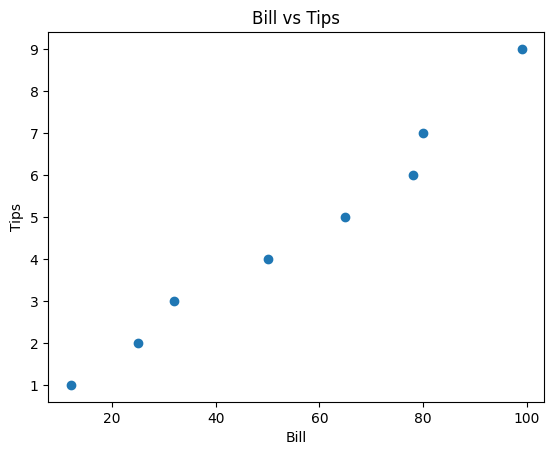

In [11]:
plt.title("Bill vs Tips")
plt.xlabel("Bill")
plt.ylabel("Tips")
plt.scatter(bill, tips)
plt.show()

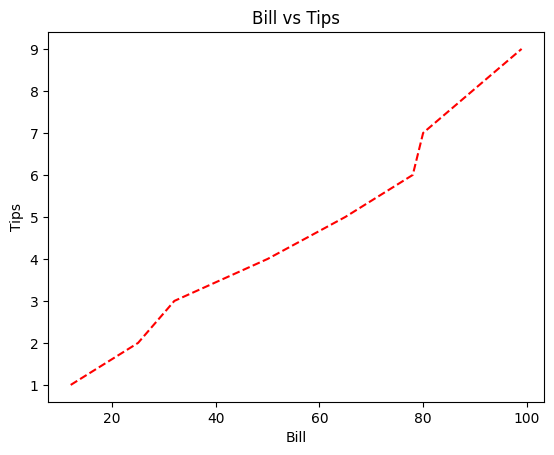

In [13]:
plt.title("Bill vs Tips")
plt.xlabel("Bill")
plt.ylabel("Tips")
plt.plot(sorted(bill), sorted(tips), "r--")
plt.show()

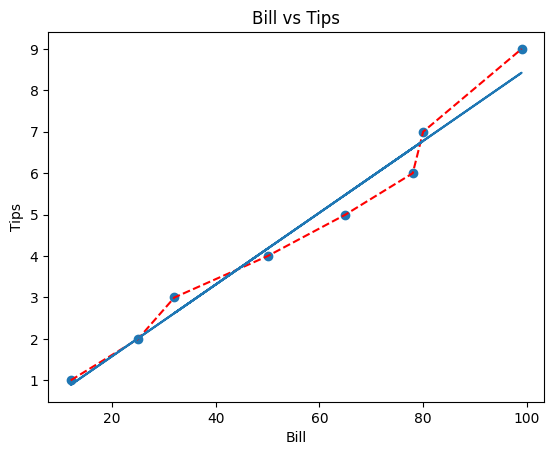

In [14]:
plt.title("Bill vs Tips")
plt.xlabel("Bill")
plt.ylabel("Tips")
plt.scatter(bill, tips)
plt.plot(sorted(bill), sorted(tips), "r--")
plt.plot(bill, pred_tips)
plt.show()

In [15]:
new_bill = 75
predicted_tips = slope*new_bill + intercept
print("Predicted tip for bill value {} is {}".format(new_bill, predicted_tips))

Predicted tip for bill value 75 is 6.346456692913386


In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
model = LinearRegression()

In [5]:
model.fit(bill.reshape(-1,1), tips)

LinearRegression()

In [6]:
bill

array([50, 32, 78, 99, 12, 25, 80, 65])

In [7]:
bill.reshape(-1,1)

array([[50],
       [32],
       [78],
       [99],
       [12],
       [25],
       [80],
       [65]])

In [8]:
model.coef_

array([0.08661417])

In [10]:
model.intercept_

-0.14960629921259816

In [12]:
from sklearn.metrics import r2_score

In [13]:
r2_score(tips, model.predict(bill.reshape(-1,1)))

0.9766344996349141

# To calculate the r2_score -> R squared score
# Total sum of squared Error ( TSS )
# Sum of Squared Residual ( SSR )

# r2 = 1 - ( SSR/TSS )

# The range of r2 score is 0-1

In [14]:
t_mean = tips.mean()

In [15]:
p_pred = model.predict(bill.reshape(-1,1))

In [16]:
p_pred

array([4.18110236, 2.62204724, 6.60629921, 8.42519685, 0.88976378,
       2.01574803, 6.77952756, 5.48031496])

In [17]:
TSS = np.sum(np.square(tips - t_mean))
TSS

49.875

In [19]:
SSR = np.sum(np.square(tips - p_pred))
SSR

1.1653543307086598

In [22]:
r2 = 1 -(SSR/TSS)

In [23]:
r2

0.9766344996349141

In [24]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [26]:
df = pd.read_excel(r"C:\Users\AAYUB SAYYAD\Downloads\new_home.xlsx")

In [27]:
df

,Area,No. Bedroom,Gallery,Location,Price
0,580,1,1,Pune,45
1,660,2,2,Pune,60
2,800,3,2,Pune,90
3,650,2,1,Mumbai,90
4,940,3,2,Mumbai,150
5,780,2,1,Mumbai,110
6,510,1,1,Pune,40


In [79]:
dummy_loc = list(map(lambda x: 0 if x == "Pune" else 1, df["Location"]))

In [80]:
dummy_loc

[1, 1, 1, 1, 1, 1, 1]

In [81]:
df["Location"] = dummy_loc

In [82]:
df

,Area,No. Bedroom,Gallery,Location,Price,Locations
0,580,1,1,1,45,0
1,660,2,2,1,60,0
2,800,3,2,1,90,0
3,650,2,1,1,90,1
4,940,3,2,1,150,1
5,780,2,1,1,110,1
6,510,1,1,1,40,0


In [83]:
X = df.drop("Locations", axis=1)


In [84]:
X

,Area,No. Bedroom,Gallery,Location,Price
0,580,1,1,1,45
1,660,2,2,1,60
2,800,3,2,1,90
3,650,2,1,1,90
4,940,3,2,1,150
5,780,2,1,1,110
6,510,1,1,1,40


In [85]:
X = df.drop("Price", axis=1)

In [87]:
X

,Area,No. Bedroom,Gallery,Location,Locations
0,580,1,1,1,0
1,660,2,2,1,0
2,800,3,2,1,0
3,650,2,1,1,1
4,940,3,2,1,1
5,780,2,1,1,1
6,510,1,1,1,0


In [50]:
y = df["Price"]

In [51]:
y

0     45
1     60
2     90
3     90
4    150
5    110
6     40
Name: Price, dtype: int64

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler = StandardScaler()

In [54]:
scaled_X = scaler.fit_transform(X)

In [68]:
scaled_X

array([[-0.90662034, -1.32287566, -0.8660254 , -0.8660254 , -0.8660254 ],
       [-0.31626291,  0.        ,  1.15470054, -0.8660254 , -0.8660254 ],
       [ 0.71686259,  1.32287566,  1.15470054, -0.8660254 , -0.8660254 ],
       [-0.39005759,  0.        , -0.8660254 ,  1.15470054,  1.15470054],
       [ 1.74998809,  1.32287566,  1.15470054,  1.15470054,  1.15470054],
       [ 0.56927323,  0.        , -0.8660254 ,  1.15470054,  1.15470054],
       [-1.42318309, -1.32287566, -0.8660254 , -0.8660254 , -0.8660254 ]])

In [56]:
lr2 = LinearRegression()

In [57]:
lr2.fit(scaled_X, y)

LinearRegression()

In [63]:
lr2.predict([[-0.90662034, -1.32287566, -0.8660254 , -0.8660254, -0.8660254]])

array([46.60714285])

In [66]:
new_data = np.array([[700, 2, 3, 0, 5]])

In [67]:
scaled_new_data = scaler.transform(new_data)

In [70]:
lr2.predict(scaled_new_data)

array([150.89285714])

In [73]:
new_data2 = np.array([[700, 2, 3, 1, 5]])

In [74]:
scaled_new_data2 = scaler.transform(new_data2)

In [75]:
lr2.coef_

array([24.19841538,  0.53994925,  1.32554909,  7.59981477,  7.59981477])

In [76]:
lr2.intercept_

83.57142857142857